In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import torch
import torch
import copy
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from dnaDataloader import expermentDataloader
import os
import random
import matplotlib.colors as mcolors
from IPython.core.interactiveshell import InteractiveShell
from dnaModelUtil import printStats
from dnaModelUtil import averageDiff
from dnaDataloader import addData
from dnaDataloader import expermentDataloader
from torch.utils.data import DataLoader
import pandas as pd
import seaborn as sns
# from torchsummary import summary
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
oneMinInFPS = 1200
batch_size = 10
num_workers = 0
movieRuntime = 30
folder = '/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted/1800_nM_AR_5000'
device

device(type='cuda', index=1)

In [2]:
# data = expermentDataloader(
#     f"{folder}/index.csv",
#     f"{folder}", 
#     length = movieRuntime*oneMinInFPS
# )
# # rawData = [([np.array([e]) for e in d[0] ], d[1]) for d in data]
# rawData = [d for d in data]
# featIn = len(rawData[0][0])
# trainValidData = []
# testData = []
# addData(testData, trainValidData, rawData, rhsSize=300)


# np.random.shuffle(trainValidData)
# trainData = []
# validData = []
# addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

# trainDataset = DataLoader(trainData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True) 
# validDataset = DataLoader(validData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
# testDataset = DataLoader(testData, batch_size=len(testData), shuffle=True, num_workers=num_workers, pin_memory=True)
# print(f"Training dataset size: {len(trainData)}")
# print(f"Valid dataset size: {len(validData)}")
# print(f"Testing dataset size: {len(testData)}")
# print(f"Total: {len(trainData) + len(validData) + len(testData)}")
# print(f"number train batches:{len(trainDataset)}")
# print(f"number valid batches:{len(validDataset)}")
# print(f"number test batches:{len(testDataset)}")

In [3]:
# featIn

before adding RNN just convert current Sequential model to class

In [4]:
# class MLPModel(nn.Module):
#     def __init__(self, featIn, capacity):
#         super().__init__()
#         self.input = nn.Linear(featIn,capacity)
#         self.inputAct = nn.Tanh()
#         self.inputDropout = nn.Dropout(p=0.2)
#         self.hidden1 = nn.Linear(capacity,capacity)
#         self.hidden1Act = nn.Tanh()
#         self.hidden1Dropout = nn.Dropout(p=0.2)
#         self.hidden2 = nn.Linear(capacity,capacity)
#         self.hidden2Act = nn.Tanh()
#         self.output = nn.Linear(capacity,1)
        
#     def forward(self, x):
#         x = self.inputAct(self.input(x))
#         x = self.inputDropout(x)
#         x = self.hidden1Act(self.hidden1(x))
#         x = self.hidden1Dropout(x)
#         x = self.hidden2Act(self.hidden2(x))
#         x = self.output(x)
#         return x
        

In [5]:
# model = MLPModel(featIn=featIn, capacity=int(featIn*0.06))
# model = model.to(device)

In [6]:
# MSE = nn.MSELoss(reduction = 'mean')
# adam = torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay=1e-5)

# em = 20
# epochs = 25

# losses = []
# accs = []
# print("training...")
# for e in range(epochs): 
#     avgLossTrain = []
#     currentAccTrain = []
#     model.train()
#     for i, (inputs, targets) in enumerate(trainDataset):
#         inputs, targets= inputs.float().to(device), targets.float().to(device)
#         outputs = model(inputs)
#         loss = MSE(outputs, targets)
#         avgLossTrain.append(float(loss.item()))
#         adam.zero_grad()
#         loss.backward()
#         adam.step()
#         totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
#         totalCorrect = totalCorrect.item()
#         currentAccTrain.append(float(totalCorrect/len(targets)))
        
#     avgLoss = []
#     currentAcc = []
#     model.eval()
#     for i, (inputs, targets) in enumerate(validDataset):
#         inputs, targets= inputs.float().to(device), targets.float().to(device)
#         outputs = model(inputs)
#         loss = MSE(outputs, targets)
#         outputPlot = outputs.clone().detach().cpu().numpy()
#         targetsPlot = targets.clone().detach().cpu().numpy()
#         avgLoss.append(float(loss.clone().detach().cpu().numpy()))
#         totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
#         totalCorrect = totalCorrect.clone().detach().cpu().numpy()
#         currentAcc.append(float(totalCorrect/len(targets)))
#         print(f"\
#         epoch: {e}/{epochs}\t \
#         Train Loss:{'%.4f' % (np.sum(avgLossTrain)/len(avgLossTrain))} Valid Loss:{'%.4f' % (np.sum(avgLoss)/len(avgLoss))}\t \
#         Train accuracy:{'%.2f' % (np.sum(currentAccTrain)/len(currentAccTrain))} Valid accuracy:{'%.2f' % (np.sum(currentAcc)/len(currentAcc))} \
#         ",end="\x1b\r")
#     accs.append(float(np.sum(currentAcc)/len(currentAcc)))
#     losses.append(float(np.sum(avgLoss)/len(avgLoss)))

In [7]:
# defultePlotSize = plt.rcParams['figure.figsize']
# plt.rcParams['figure.figsize'] = [20, 5]
# plt.subplot(1, 2, 1)
# plt.title(f'accuracy vs epochs {movieRuntime} min')
# plt.plot(list(range(len(accs[:]))), accs[:], '-', color='black', )
# plt.subplot(1, 2, 2)
# plt.title(f'losse vs epochs {movieRuntime} min')
# plt.plot(list(range(len(losses)))[:], losses[:], '-', color='black')
# plt.rcParams['figure.figsize'] = defultePlotSize
# print(f"Best acc: {max(accs)}")
# epochs*len(validDataset)

## now we are doing the RNN stuff 
Torch RNN


<em>Parameters</em>:
  <ul>
    <li> <p>input_size – The number of expected features in the input x </li>
    <li> <p>hidden_size – The number of features in the hidden state h </li>
    <li> <p>num_layers – Number of recurrent layers. 
    <br>E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default: 1 </li>
    <li> <p>nonlinearity – The non-linearity to use. Can be either 'tanh' or 'relu'. Default: 'tanh' </li>
    <li> <p>bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True </li>
    <li> <p>batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False 
    <li> <p>dropout – If non-zero, introduces a Dropout layer on the outputs of each RNN layer except the last layer, with dropout probability equal to dropout. Default: 0 </li>
    <li> <p>bidirectional – If True, becomes a bidirectional RNN. Default: False </li>
  </ul>

$ h_t = \tanh(x_t W_{ih}^T + b_{ih} + h_{t-1}W_{hh}^T + b_{hh}) $

where:

<br>N = batch size 
<br>L = sequence length
<br>D = 2 if bidirectional=True otherwise 1 
<br>$H_{in}$ = input_size 
<br>$H_{out}$ = hidden_size 


In [8]:
# folder = set above when we orginal read in the data
oneTimeUnitInFPS = oneMinInFPS
totalRuntime = movieRuntime*oneMinInFPS
data = expermentDataloader(
    f"{folder}/index.csv",
    f"{folder}", 
    length = oneTimeUnitInFPS,
)
targets = [i[1] for i in data]
timeSlices = []
for startTime in range(0, totalRuntime, oneTimeUnitInFPS):
    data = expermentDataloader(
        f"{folder}/index.csv",
        f"{folder}", 
        length = oneTimeUnitInFPS,
        start=startTime
    )
    timeSlices.append([np.array(i[0]) for i in data])
rawInput = list(zip(*timeSlices))
rawInput = [np.array(i) for i in rawInput]
print(f"Number of experments: {len(rawInput)}")
print(f"Number of time steps: {len(rawInput[0])}")
print(f"Number of frames per time step: {len(rawInput[0][0])}")
print(f"One fame: {rawInput[0][0][0]}")
print(f"Total inputs: {len(rawInput)}, targets: {len(targets)}")
rawData = list(zip(rawInput,targets))
rawData[0]

Number of experments: 888
Number of time steps: 30
Number of frames per time step: 1200
One fame: 0
Total inputs: 888, targets: 888


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([144]))

In [9]:
featIn = len(rawData[0][0][0])
type(rawData[0][0][0][0])

numpy.int64

In [10]:
featIn = len(rawData[0][0][0])
featIn

1200

In [11]:
trainValidData = []
testData = []
addData(testData, trainValidData, rawData, rhsSize=300)


np.random.shuffle(trainValidData)
trainData = []
validData = []
addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

trainDataset = DataLoader(trainData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True) 
validDataset = DataLoader(validData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
testDataset = DataLoader(testData, batch_size=len(testData), shuffle=True, num_workers=num_workers, pin_memory=True)
print(f"Training dataset size: {len(trainData)}")
print(f"Valid dataset size: {len(validData)}")
print(f"Testing dataset size: {len(testData)}")
print(f"Total: {len(trainData) + len(validData) + len(testData)}")
print(f"number train batches:{len(trainDataset)}")
print(f"number valid batches:{len(validDataset)}")
print(f"number test batches:{len(testDataset)}")

Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1


<em>Inputs:</em> input, h_0

<em>input</em>: tensor of shape $ L, H_{in} $ for unbatched input, or batched input as $ (L, N, H_{in}) $ <br>
when <em>batch_first=False</em> or $(N, L, H_{in})$ when <em>batch_first=True</em>. <br>
The input can also be a packed variable length sequence. <br>
See <em>torch.nn.utils.rnn.pack_padded_sequence</em> or <br>
<em>torch.nn.utils.rnn.pack_sequence</em> for details.

<em>h_0</em>: tensor of shape $(D * \text{num\_layers}, H_{out})$ for unbatched input or <br>
$(D * \text{num\_layers}, N, H_{out})$ for batched containing the initial hidden <br>
state for the input sequence batch. <br>
<b>Defaults to zeros if not provided</b>.

where:
<br> N = batch size 
<br> L = sequence length 
<br> D = 2 if bidirectional=True otherwise 1 
<br> $H_{in}$ = input_size 
<br> $H_{out}$ = hidden_size 

In [12]:
class RNNModel(nn.Module):
    def __init__(self, featIn, capacity, hiddenLayers=2):
        super(RNNModel, self).__init__()
        self.capacity = capacity
        self.featIn = featIn
        self.hiddenLayers = hiddenLayers
        # RNN
        self.rnn = nn.RNN(featIn, self.capacity, hiddenLayers, batch_first=True, nonlinearity='relu', dropout=0.2)
        
        # Readout layer
        self.fc = nn.Linear(capacity, 1)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.hiddenLayers, x.size(0),self.capacity).to(device)
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [13]:
model = RNNModel(featIn=oneTimeUnitInFPS, capacity=int(featIn*0.25), hiddenLayers=4)
model = model.to(device)
str(model)

'RNNModel(\n  (rnn): RNN(1200, 300, num_layers=4, batch_first=True, dropout=0.2)\n  (fc): Linear(in_features=300, out_features=1, bias=True)\n)'

In [14]:
MSE = nn.MSELoss(reduction = 'sum')
adam = torch.optim.Adam(model.parameters(),lr=0.00001,weight_decay=1e-5)

epochs = 1000
em = 20
losses = []
accs = []
losses_t = []
accs_t = []
print("training...")
for e in range(epochs): 
    avgLossTrain = []
    currentAccTrain = []
    model.train()
    for i, (inputs, targets) in enumerate(trainDataset):
        inputs, targets= inputs.float().to(device), targets.float().to(device)
        outputs = model(inputs)
        loss = MSE(outputs, targets)
        avgLossTrain.append(float(loss.item()))
        adam.zero_grad()
        loss.backward()
        adam.step()
        totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
        totalCorrect = totalCorrect.item()
        currentAccTrain.append(float(totalCorrect/len(targets)))
    accs_t.append(float(np.sum(currentAccTrain)/len(currentAccTrain)))
    losses_t.append(float(np.sum(avgLossTrain)/len(avgLossTrain)))
        
    avgLoss = []
    currentAcc = []
    model.eval()
    for i, (inputs, targets) in enumerate(validDataset):
        inputs, targets= inputs.float().to(device), targets.float().to(device)
        outputs = model(inputs)
        loss = MSE(outputs, targets)
        outputPlot = outputs.clone().detach().cpu().numpy()
        targetsPlot = targets.clone().detach().cpu().numpy()
        avgLoss.append(float(loss.clone().detach().cpu().numpy()))
        totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
        totalCorrect = totalCorrect.clone().detach().cpu().numpy()
        currentAcc.append(float(totalCorrect/len(targets)))
        print(f"\
        epoch: {e}/{epochs}\t \
        Train Loss:{'%.4f' % (np.sum(avgLossTrain)/len(avgLossTrain))} Valid Loss:{'%.4f' % (np.sum(avgLoss)/len(avgLoss))}\t \
        Train accuracy:{'%.2f' % (np.sum(currentAccTrain)/len(currentAccTrain))} Valid accuracy:{'%.2f' % (np.sum(currentAcc)/len(currentAcc))} \
        ",end="\x1b\r")
    accs.append(float(np.sum(currentAcc)/len(currentAcc)))
    losses.append(float(np.sum(avgLoss)/len(avgLoss)))

training...


Best acc: 0.6


10000

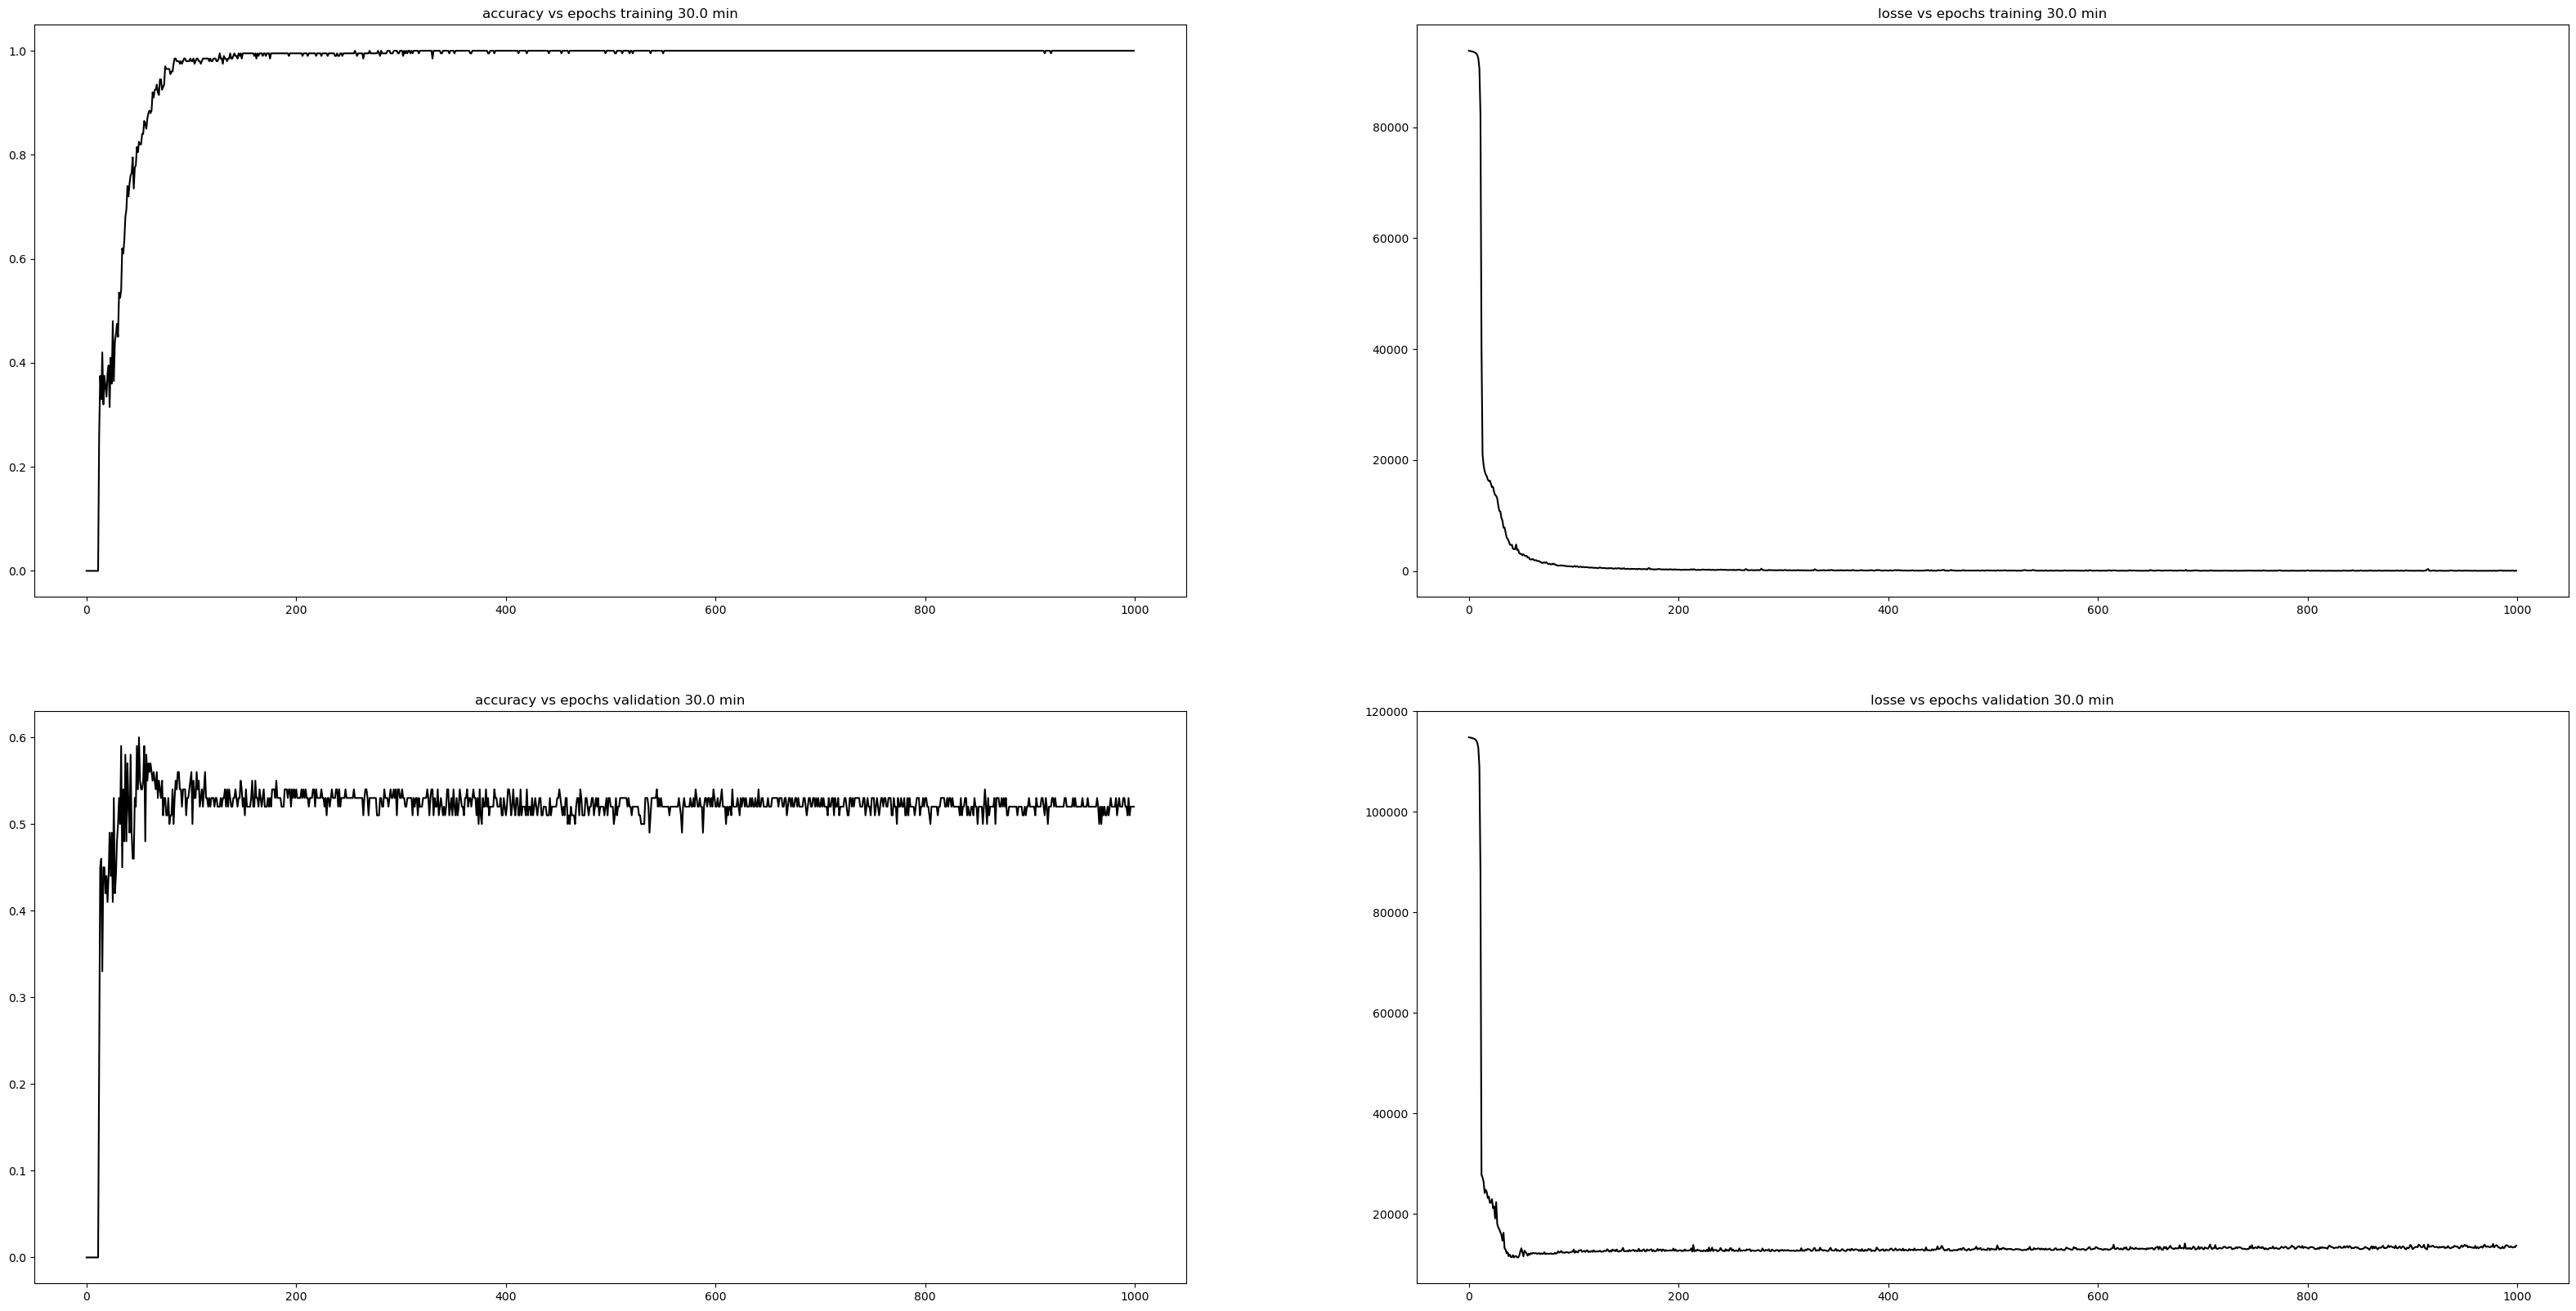

In [15]:
defultePlotSize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [40, 20]

plt.subplot(2, 2, 1)
plt.title(f'accuracy vs epochs training {totalRuntime/oneMinInFPS} min')
plt.plot(list(range(len(accs_t[:]))), accs_t[:], '-', color='black', )
plt.subplot(2, 2, 2)
plt.title(f'losse vs epochs training {totalRuntime/oneMinInFPS} min')
plt.plot(list(range(len(losses_t)))[:], losses_t[:], '-', color='black')

plt.subplot(2, 2, 3)
plt.title(f'accuracy vs epochs validation {totalRuntime/oneMinInFPS} min')
plt.plot(list(range(len(accs[:]))), accs[:], '-', color='black', )
plt.subplot(2, 2, 4)
plt.title(f'losse vs epochs validation {totalRuntime/oneMinInFPS} min')
plt.plot(list(range(len(losses)))[:], losses[:], '-', color='black')
plt.rcParams['figure.figsize'] = defultePlotSize
print(f"Best acc: {max(accs)}")

epochs*len(validDataset)